<a href="https://colab.research.google.com/github/aryangoyalag/titanic/blob/main/Copy_of_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
tf.version


<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [ ]:
!pip install -q sklearn


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc


In [ ]:
dftrain = pd.read_csv("train_data.csv")
dftest = pd.read_csv("test_data.csv")
y_train = dftrain.pop('Survived')
y_test = dftest.pop('Survived')
dftrain['Family_size']=dftrain['Family_size'].astype(str)
dftest['Family_size']=dftest['Family_size'].astype(str)
dftrain.head()
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   792 non-null    int64  
 1   PassengerId  792 non-null    int64  
 2   Sex          792 non-null    int64  
 3   Age          792 non-null    float64
 4   Fare         792 non-null    float64
 5   Pclass_1     792 non-null    int64  
 6   Pclass_2     792 non-null    int64  
 7   Pclass_3     792 non-null    int64  
 8   Family_size  792 non-null    object 
 9   Title_1      792 non-null    int64  
 10  Title_2      792 non-null    int64  
 11  Title_3      792 non-null    int64  
 12  Title_4      792 non-null    int64  
 13  Emb_1        792 non-null    int64  
 14  Emb_2        792 non-null    int64  
 15  Emb_3        792 non-null    int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 99.1+ KB


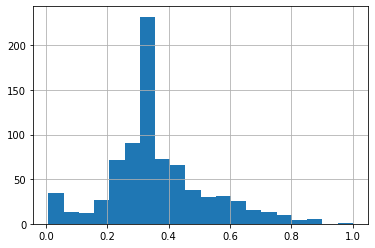

In [ ]:
dftrain.Age.hist(bins=20)

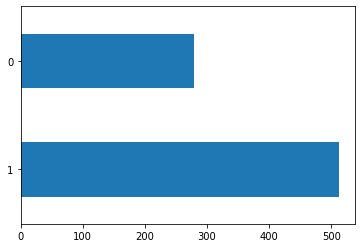

In [ ]:
dftrain.Sex.value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

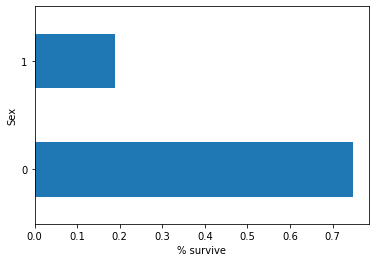

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('Sex').Survived.mean().plot(kind='barh').set_xlabel('% survive')

In [ ]:
CATEGORICAL_COLUMNS = ['Sex', 'Family_size','Pclass_1',	'Pclass_2',	'Pclass_3'		
                       ,'Title_1',	'Title_2',	'Title_3'	,'Title_4'	,'Emb_1'	,'Emb_2'	,'Emb_3' ]
NUMERIC_COLUMNS = ['Age', 'Fare']

feature_columns = []#timestamp 1:33:00 a lot to unpack here
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique() #gets list of all unique values from given feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='Sex', vocabulary_list=(1, 0), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Family_size', vocabulary_list=('0.1', '0.0', '0.4', '0.2', '0.6', '0.5', '0.3', '0.7', '1.0'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Pclass_1', vocabulary_list=(0, 1), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Pclass_2', vocabulary_list=(0, 1), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Pclass_3', vocabulary_list=(1, 0), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Title_1', vocabulary_list=(1, 0), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Title_2', vocabulary_list=(0, 1), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Title_3', vocabulary_list=

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dftest, y_test, num_epochs=1, shuffle=False)

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpib4s6f6m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  

0.84


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpib4s6f6m/model.ckpt-250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


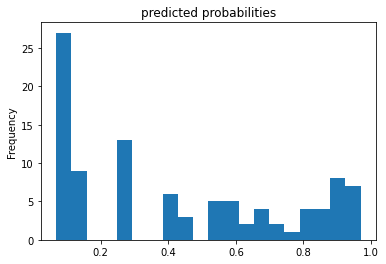

In [ ]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

In [ ]:
result = list(linear_est.predict(eval_input_fn))
print(dftest.loc[10])
print(y_test.loc[10])
print(result[10]['probabilities'][1])

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpib4s6f6m/model.ckpt-250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Unnamed: 0           801
PassengerId          802
Sex                    0
Age               0.3875
Fare           0.0512366
Pclass_1               0
Pclass_2               1
Pclass_3               0
Family_size          0.2
Title_1                1
Title_2                0
Title_3                0
Title_4                0
Emb_1                  0
Emb_2                  0
Emb_3                  1
Name: 10, dtype: object
1
0.8526642
